In [1]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def create_boxplots_from_df(df):
    num_cols = 2
    num_features = df.shape[1]
    num_rows = (num_features + 1) // num_cols
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    for i, feature in enumerate(df.columns):
        sns.boxplot(x=df[feature], ax=axs[i]) 
        axs[i].set_title("Boxplot of " + feature)
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

def show_countplots_by_target(df, columns, target_column_name):
    num_cols = 2
    num_features = len(columns)
    num_rows = (num_features + 1) // num_cols
    num_cols = 2
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
    axs = axs.flatten()
    # Use a for loop to loop over each feature and create a countplot
    for i, feature in enumerate(columns):
        sns.countplot(x=feature, data=df, hue=target_column_name, ax=axs[i])
        axs[i].set_title(f"Countplot of {feature} by {target_column_name}")
        axs[i].set_ylabel('')
    for i in range(num_features, num_rows * num_cols):
        fig.delaxes(axs[i])
    plt.tight_layout()
    plt.show()

In [2]:
if not os.path.exists("./data_validation.csv"):
    data_frame = pd.read_csv("../../dataset/data-ori.csv")
    df_train, df_validation = train_test_split(
        data_frame,
        test_size=0.10,
        stratify=data_frame['SOURCE'],
    )
    
    df_train.to_csv("./data_train.csv", index=False)
    df_validation.to_csv("./data_validation.csv", index=False)

In [3]:
df_numerical=df_validation.loc[:,['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE', 'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE']]
df_categorical=df_validation.loc[:,['SEX','SOURCE']]

print("Data set shape: ",df_validation.shape)
print("Number of Duplicates: ",df_validation.duplicated().sum())
print("Nmber of NaN:", df_validation.isna().sum().sum())
print("\nData Info:")
df_validation.info()
print("\nData Head:")
df_validation.head()

Data set shape:  (442, 11)
Number of Duplicates:  0
Nmber of NaN: 0

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 442 entries, 4114 to 3126
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   442 non-null    float64
 1   HAEMOGLOBINS  442 non-null    float64
 2   ERYTHROCYTE   442 non-null    float64
 3   LEUCOCYTE     442 non-null    float64
 4   THROMBOCYTE   442 non-null    int64  
 5   MCH           442 non-null    float64
 6   MCHC          442 non-null    float64
 7   MCV           442 non-null    float64
 8   AGE           442 non-null    int64  
 9   SEX           442 non-null    object 
 10  SOURCE        442 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 41.4+ KB

Data Head:


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
4114,29.1,9.4,3.37,12.8,416,27.9,32.3,86.4,77,F,out
1360,43.9,14.6,5.26,6.4,97,27.8,33.3,83.5,33,F,in
487,48.0,16.5,5.56,7.0,277,29.7,34.4,86.3,19,M,out
1311,33.1,11.3,3.69,8.5,266,30.6,34.1,89.7,32,F,out
1053,38.2,12.8,4.65,5.7,80,27.5,33.5,82.2,29,F,in


In [4]:
df_validation.nunique().to_frame('Unqiue Values')

,Unqiue Values
HAEMATOCRIT,194
HAEMOGLOBINS,93
ERYTHROCYTE,232
LEUCOCYTE,153
THROMBOCYTE,264
MCH,107
MCHC,60
MCV,197
AGE,88
SEX,2


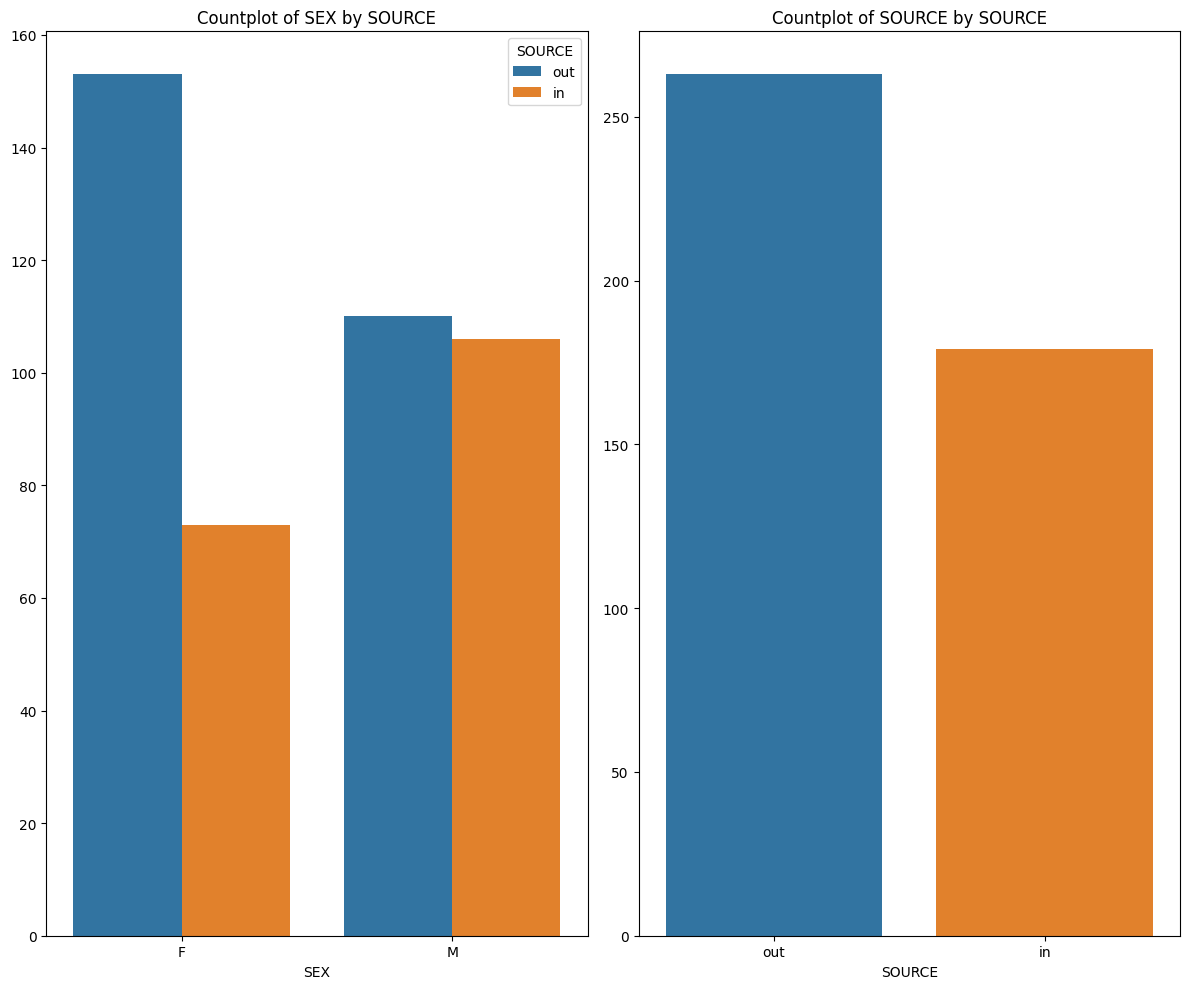

In [5]:
show_countplots_by_target(df_categorical, df_categorical.columns, "SOURCE")

In [6]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
HAEMATOCRIT,442.0,38.264253,5.947502,15.3,34.40,38.70,42.5000,53.00
HAEMOGLOBINS,442.0,12.757919,2.069187,5.1,11.40,12.85,14.2750,18.10
ERYTHROCYTE,442.0,4.550769,0.816713,1.8,4.10,4.59,5.0775,7.86
LEUCOCYTE,442.0,8.849095,4.891203,1.1,5.70,7.80,10.7000,40.90
THROMBOCYTE,442.0,256.997738,116.175907,14.0,186.25,258.00,324.7500,1121.00
MCH,442.0,28.241403,2.520713,17.9,27.20,28.70,29.7000,35.10
MCHC,442.0,33.328054,1.198480,26.1,32.70,33.40,34.1000,38.40
MCV,442.0,84.680543,6.425804,60.3,81.70,85.35,88.5750,103.20
AGE,442.0,46.271493,21.411709,1.0,30.00,45.50,63.0000,92.00


array([[<Axes: title={'center': 'HAEMATOCRIT'}>,
        <Axes: title={'center': 'HAEMOGLOBINS'}>,
        <Axes: title={'center': 'ERYTHROCYTE'}>],
       [<Axes: title={'center': 'LEUCOCYTE'}>,
        <Axes: title={'center': 'THROMBOCYTE'}>,
        <Axes: title={'center': 'MCH'}>],
       [<Axes: title={'center': 'MCHC'}>,
        <Axes: title={'center': 'MCV'}>, <Axes: title={'center': 'AGE'}>]],
      dtype=object)

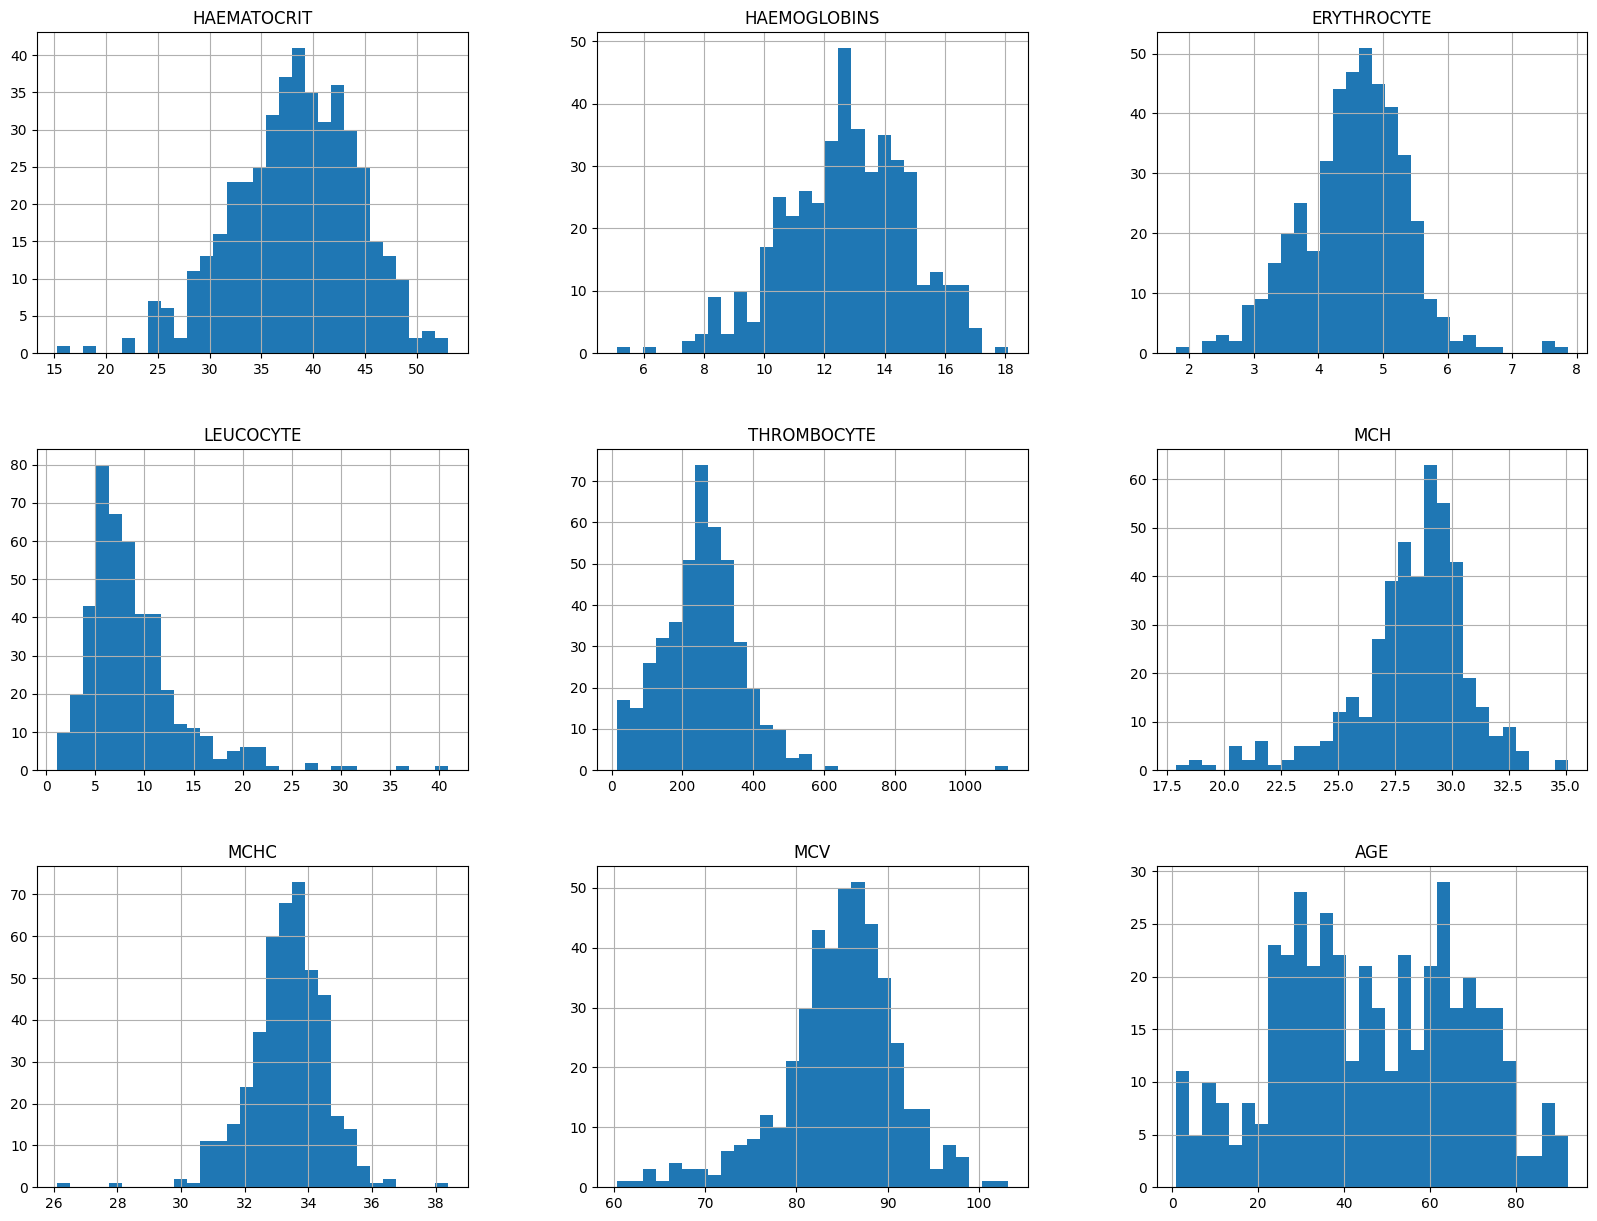

In [7]:
df_numerical.hist(bins=30, figsize=(20,15))

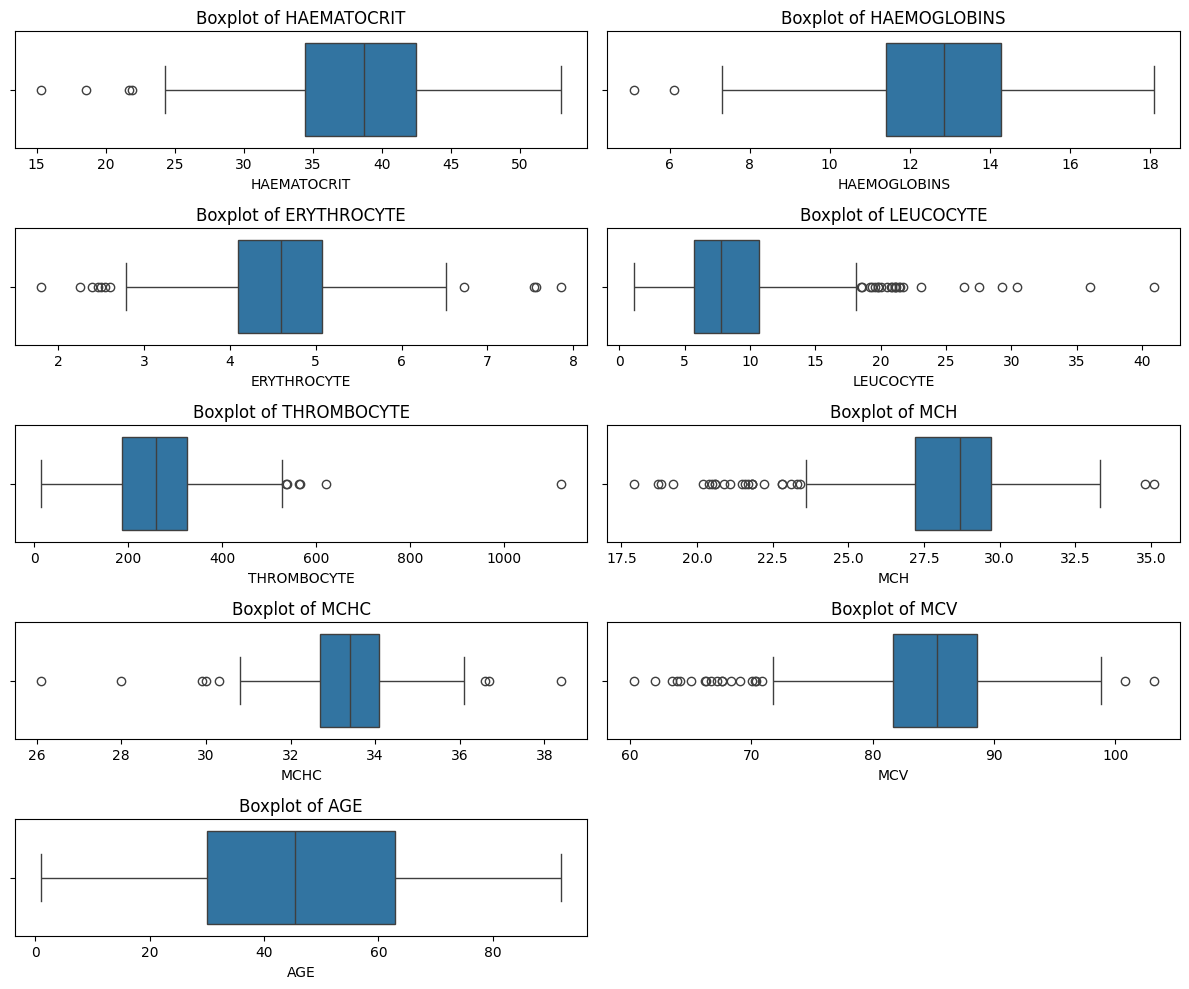

In [8]:
create_boxplots_from_df(df_numerical)

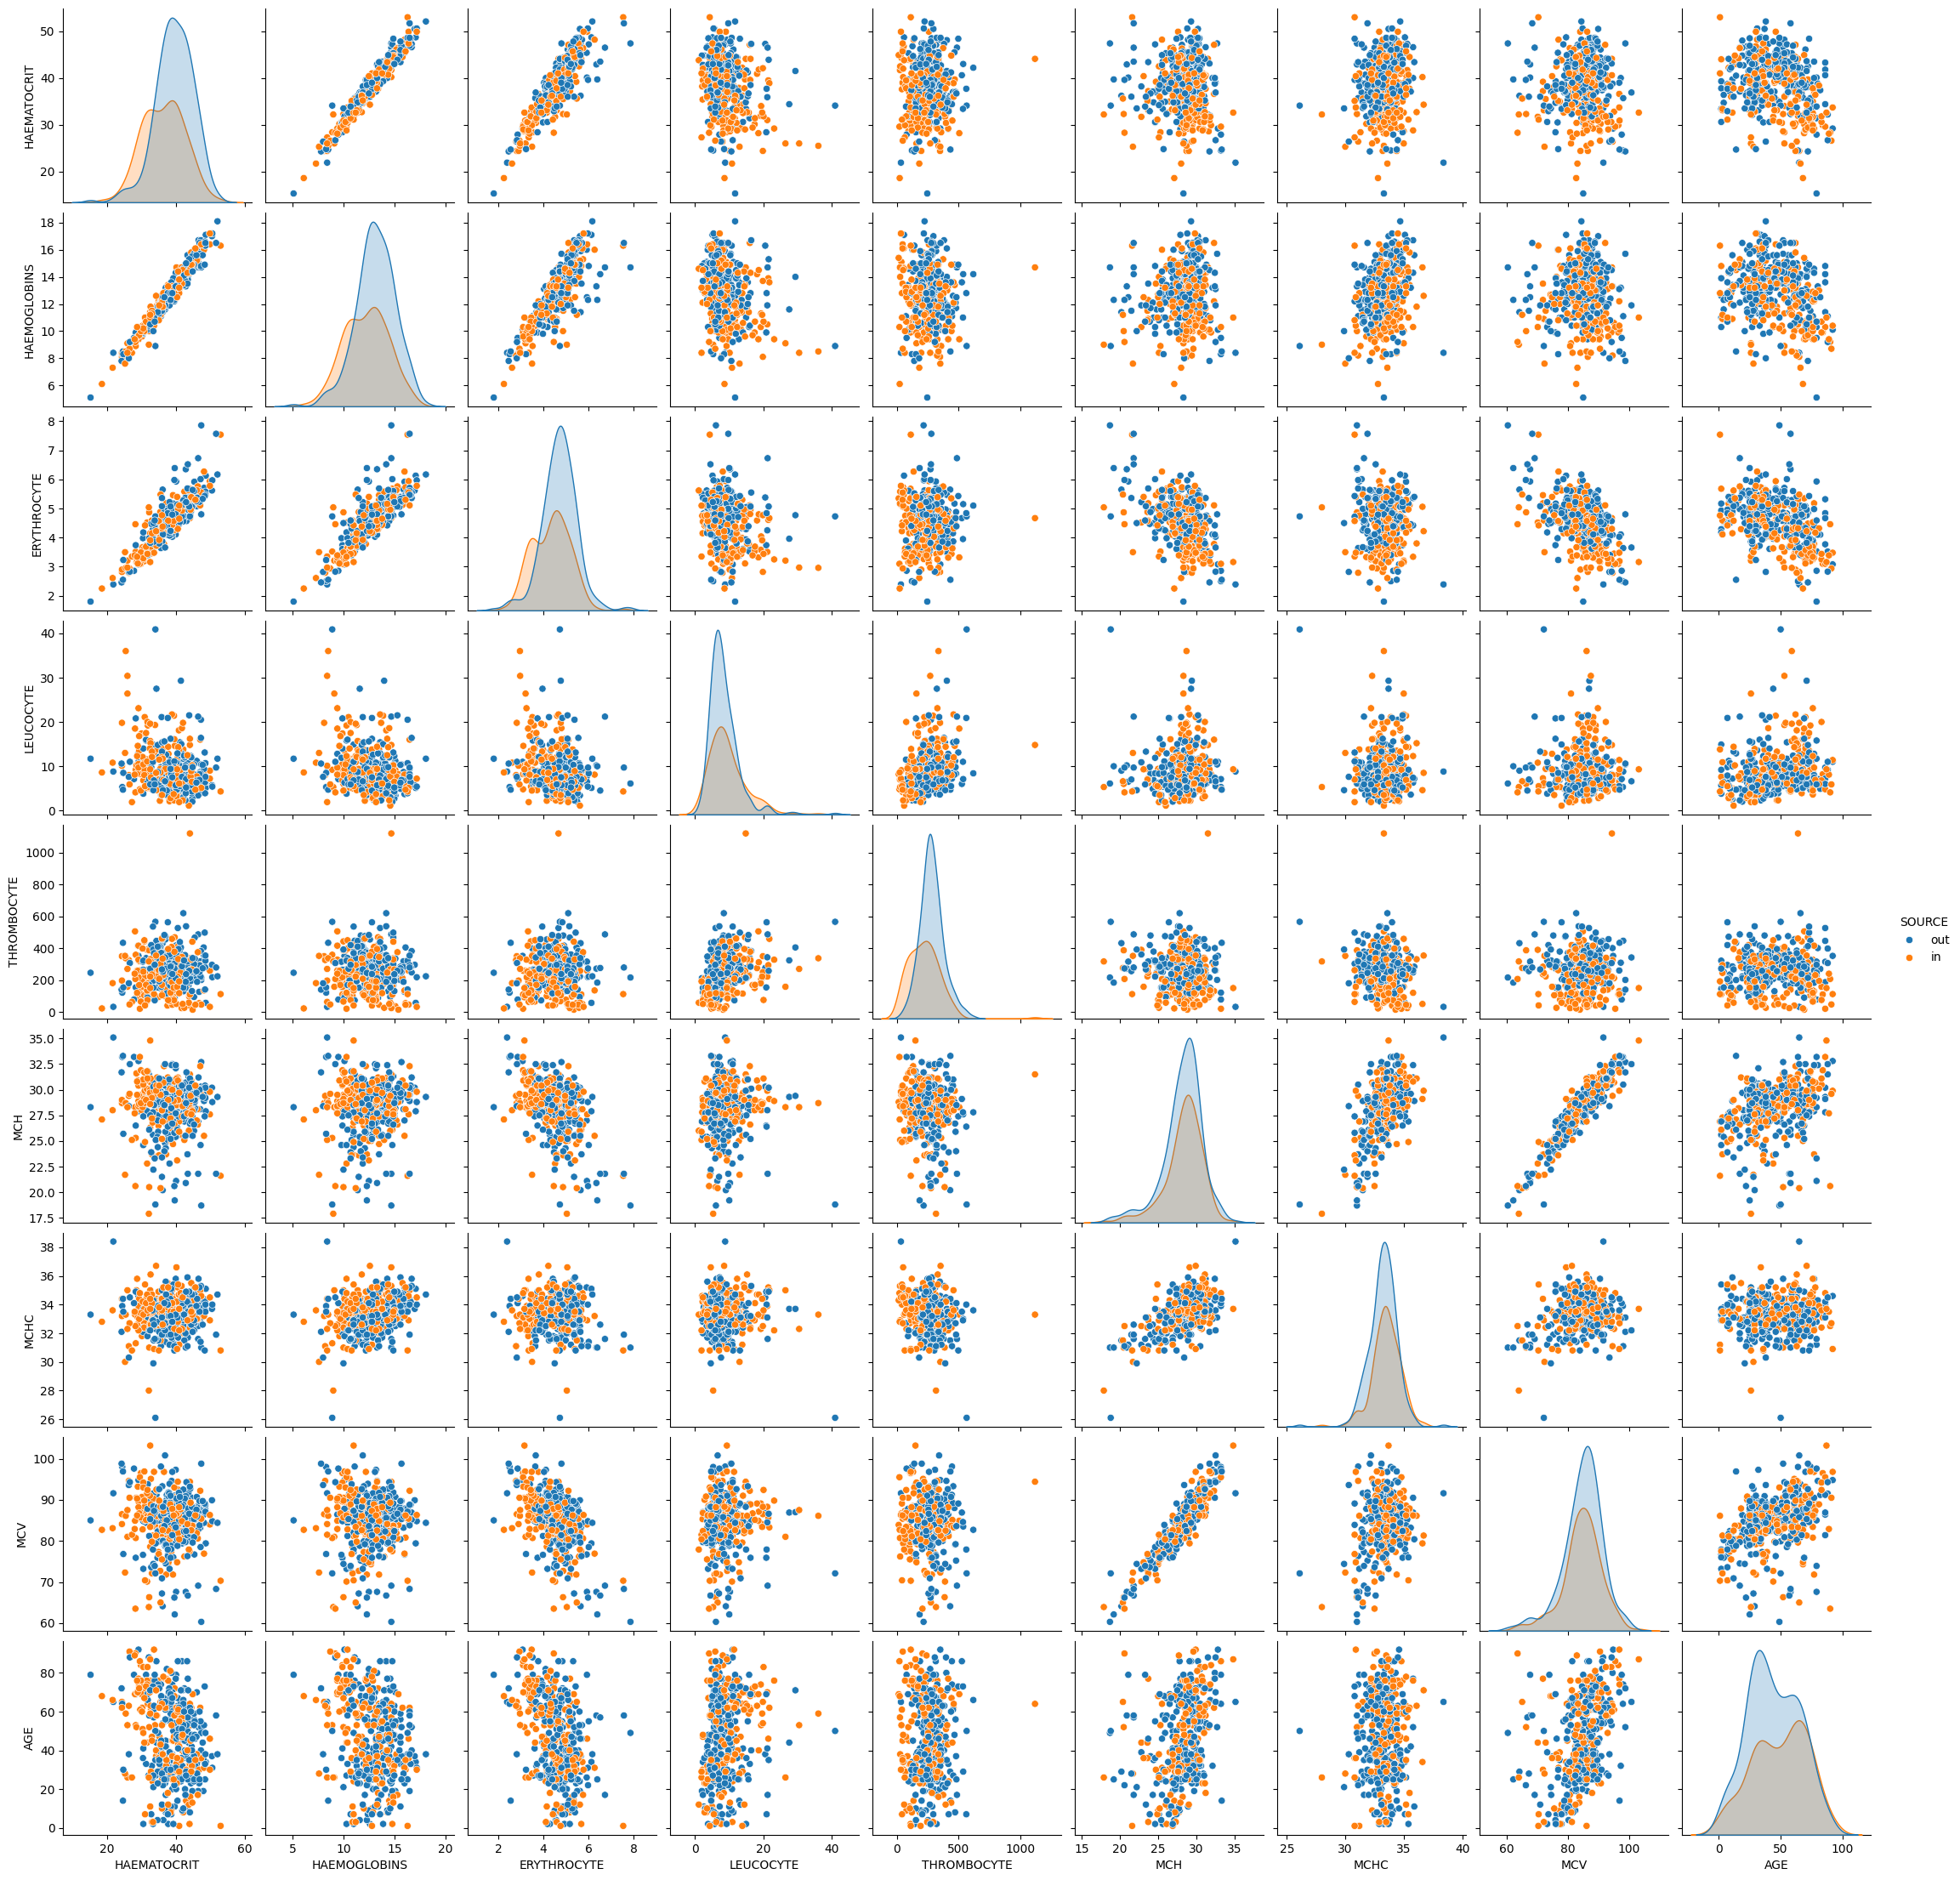

In [9]:
sns.pairplot(df_validation, hue='SOURCE')

In [10]:
numerical_correlation_mt = df_numerical.corr()
numerical_correlation_mt

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
HAEMATOCRIT,1.000000,0.976518,0.889730,-0.227584,0.038401,-0.041535,0.077960,-0.086252,-0.289932
HAEMOGLOBINS,0.976518,1.000000,0.839062,-0.227998,-0.007491,0.086698,0.287211,-0.029926,-0.276468
ERYTHROCYTE,0.889730,0.839062,1.000000,-0.206887,0.035872,-0.454191,-0.059847,-0.518650,-0.404513
LEUCOCYTE,-0.227584,-0.227998,-0.206887,1.000000,0.320112,0.000688,-0.046469,0.018815,0.188789
THROMBOCYTE,0.038401,-0.007491,0.035872,0.320112,1.000000,-0.100917,-0.209539,-0.025084,0.045213
MCH,-0.041535,0.086698,-0.454191,0.000688,-0.100917,1.000000,0.586514,0.925085,0.338998
MCHC,0.077960,0.287211,-0.059847,-0.046469,-0.209539,0.586514,1.000000,0.237343,0.014804
MCV,-0.086252,-0.029926,-0.518650,0.018815,-0.025084,0.925085,0.237343,1.000000,0.394591
AGE,-0.289932,-0.276468,-0.404513,0.188789,0.045213,0.338998,0.014804,0.394591,1.000000


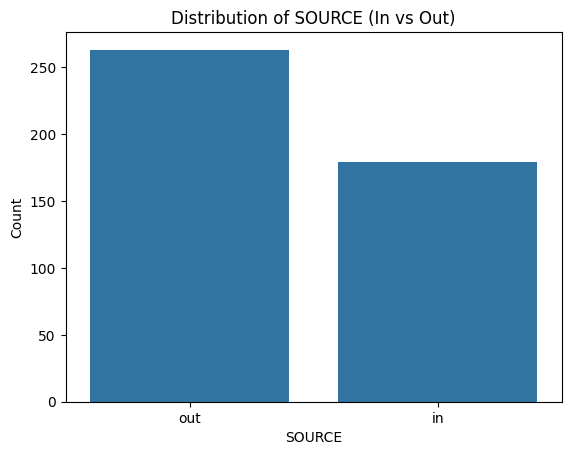

In [11]:
sns.countplot(x=df_validation['SOURCE'])
plt.title("Distribution of SOURCE (In vs Out)")
plt.xlabel("SOURCE")
plt.ylabel("Count")
plt.show()

In [12]:
source_counts = df_validation['SOURCE'].value_counts()
source_proportions = df_validation['SOURCE'].value_counts(normalize=True)
print("Counts of 'SOURCE':\n", source_counts)
print("\nProportions of 'SOURCE':\n", source_proportions)

Counts of 'SOURCE':
 SOURCE
out    263
in     179
Name: count, dtype: int64

Proportions of 'SOURCE':
 SOURCE
out    0.595023
in     0.404977
Name: proportion, dtype: float64
